In [6]:
import pandas as pd
import logging
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

from Modules.ML_pipelines import *

In [2]:
# Configure basic logging
logging.basicConfig(level=logging.INFO, force=True, format='%(levelname)s: %(message)s')

In [3]:
logging.getLogger().setLevel(logging.INFO)

### Outcome Columns of Interest ###

* `TripStart`
* `TripEnd`
* `TripType`
* `NumTrips`
* `TripDisExSW`

In [31]:
df = pd.read_pickle("/home/trapfishscott/Cambridge24.25/D200_ML_econ/ProblemSets/Project/data/merged_df2017.pkl")

with open("/home/trapfishscott/Cambridge24.25/D200_ML_econ/ProblemSets/Project/data/TripType_mapping.pkl", "rb") as f:
    trip_type_mapping = pickle.load(f)

In [32]:
one_hot_columns = ["TripPurpose_B01ID"]
df = df.drop(columns=["TripPurpose_B02ID", "TripPurpose_B04ID"], axis=1)

In [33]:
# Apply one-hot to categorical
ohe = OneHotEncoder(sparse_output=False)

# Careful not to run twice

for col in one_hot_columns:
    df[col] = df[col].astype(int)

ohe.fit_transform(df[one_hot_columns])


ohe_array = ohe.transform(df[one_hot_columns])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(one_hot_columns))

# Reset index to avoid misalignment
df.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

full_df = pd.concat([df, ohe_df], axis=1)

In [34]:
after_one_hot_columns = ohe.get_feature_names_out(one_hot_columns)

In [35]:
corr_matrix = full_df.corr()

In [58]:
useful_columns = []

for col in corr_matrix[after_one_hot_columns].columns:
    #print(col)
    col_ascending = corr_matrix[col].abs().sort_values(ascending=False)
    
    for key, value in col_ascending.items():
        if value > 0.2:
            #print(f"{key:<25} {value}")
            if key not in useful_columns and key not in corr_matrix[after_one_hot_columns].columns and key != 'TripPurpose_B01ID':
                useful_columns.append(key)

len(useful_columns)

31

In [59]:
useful_columns

['ParkWk_B01ID',
 'OftHome_B01ID',
 'WkLift_B01ID',
 'IndWkGOR_B02ID',
 'EcoStat_B03ID',
 'TripType',
 'EcoStat_B02ID',
 'PossHmN_B01ID',
 'EducN_B01ID',
 'DTJbLong_B01ID',
 'DTJbMonth_B01ID',
 'W5xHH',
 'WkPlace_B01ID',
 'WkMode_B01ID',
 'NumTrips',
 'HHoldEmploy_B01ID',
 'JourSeq',
 'HRPWorkStat_B02ID',
 'Age_B01ID',
 'TripDisIncSW_B01ID',
 'JD',
 'TripDisIncSW',
 'TripDisExSW',
 'JOTXSC',
 'TripTotalTime',
 'JTTXSC',
 'TripTravTime',
 'PDrivSt_B01ID',
 'HHoldNumChildren',
 'HHoldStruct_B02ID',
 'HHoldNumPeople']

### TripStart

In [5]:
rf_for_fi(df=df, outcome="TripStart", corr_cut_off=0.25, max_categories=55, refit=False, cols_to_exclude=["W5xHH", "W3", "W5", "W2", 
                                                                                             "TripEndMinutes", "TripStartMinutes",
                                                                                             "TripPurpose_B02ID", "NumTrips", 
                                                                                             "TravDay_x", "TripDisExSW", "JD",
                                                                                              "TripPurpose_B04ID", "TripDisIncSW",
                                                                                               "TripDisIncSW_B01ID", "TripTravTime",
                                                                                                "TripTotalTime", "JOTXSC", "JTTXSC",
                                                                                                 "TripTotalTime_B01ID", "TripTravTime_B01ID" ])

INFO: Model: /Models/rf_model_TripStart.pkl already exists!
INFO: Refit set to: False. Loading


TravelWeekDay_B01ID       0.12
TripDestGOR_B02ID         0.03
TripOrigGOR_B02ID         0.03
TravelDayType_B01ID       0.03
EngineCap                 0.02
TWSWeek                   0.02
TravelWeekDay_B02ID       0.02
TWEWeek                   0.02
TWSDay                    0.02
VehTotMileage_B01ID       0.01
VehAge_B01ID              0.01
VehAnMileage              0.01
TWEDay                    0.01
RsMnCyA_B01ID             0.01
RsMnCyB_B01ID             0.01
DrivExp_B01ID             0.01
TravelWeekDay_B03ID       0.01
SC_B01ID                  0.01



Text(0, 0.5, 'Mean Start Time')

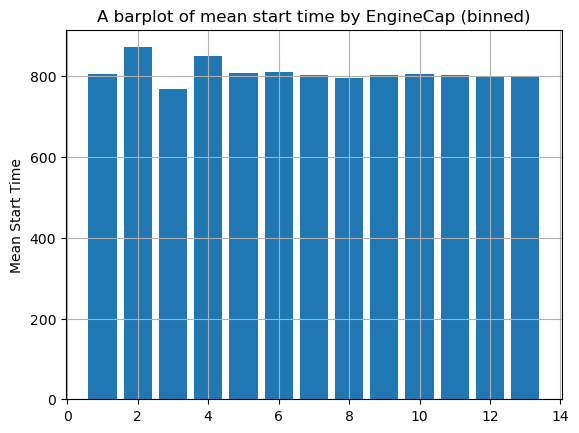

In [9]:
x = df.groupby("EngineCap_B01ID")["TripStart"].mean().index
y = df.groupby("EngineCap_B01ID")["TripStart"].mean().values

plt.grid()

plt.bar(x, y)

plt.title("A barplot of mean start time by EngineCap (binned)")
plt.ylabel("Mean Start Time")

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


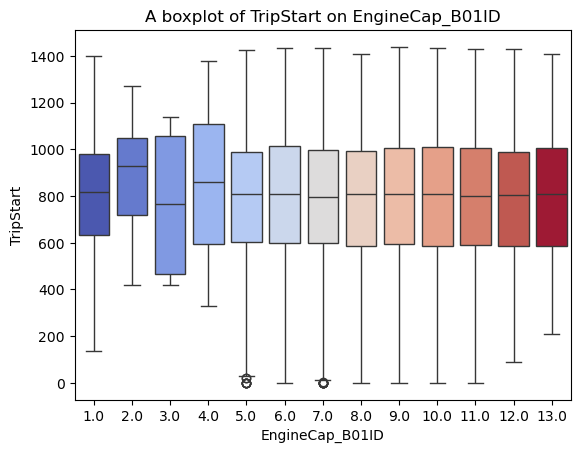

In [10]:
def make_box_plot(x, y, data=df):

    plt.title(f"A boxplot of {y} on {x}")
    sns.boxplot(data=data, x=x, y=y, palette='coolwarm',  hue=x, legend=False)


make_box_plot(x='EngineCap_B01ID', y='TripStart')

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


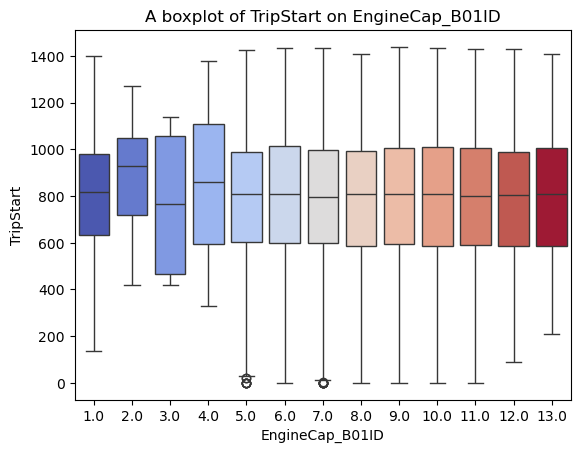

In [11]:
make_box_plot(x='EngineCap_B01ID', y='TripStart')

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


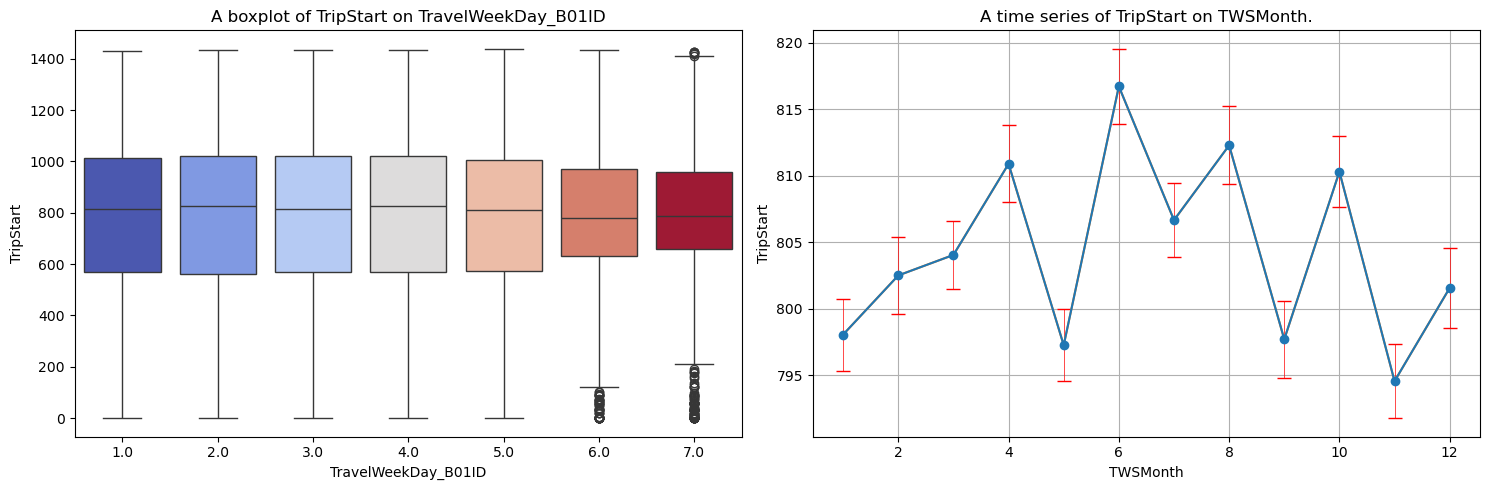

In [12]:
def make_time_plot(x, y):
    plt.title(f"A time series of {y} on {x}.")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")

    grouped_df = df.groupby(x)[y].agg(["mean", "std", "count"])
    grouped_df["stderr"] = grouped_df["std"]/ grouped_df["count"]**0.5

    x_vals = grouped_df.index
    y_vals = grouped_df["mean"]
    y_err = grouped_df["stderr"]

    plt.grid()

    plt.errorbar(x_vals, y_vals,  yerr=y_err, fmt="o-", capsize=5, capthick=1, ecolor="red", elinewidth=0.5)
    plt.plot(x_vals,y_vals)



plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_box_plot(x="TravelWeekDay_B01ID", y="TripStart")

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="TripStart")

plt.tight_layout()

### NumTrips

In [6]:
rf_for_fi(df=df, corr_cut_off=0.15, outcome="NumTrips", refit=False, max_categories=55, cols_to_exclude=["JTTXSC", "JD", "JOTXSC", "TripTravTime",
                                                                                             "TripTotalTime", "TripDisIncSW",
                                                                                               "TripDisExSW", "IndividualID_x",
                                                                                                 "IndividualID_y", "VehicleID",
                                                                                                 "W5", "W3", "TravDay_x"
                                                                                               ])

INFO: 187
INFO: Model: /Models/rf_model_NumTrips.pkl already exists!
INFO: Refit set to: False. Loading
INFO: 187
INFO: 187


TravelWeekDay_B01ID       0.04
TripStart                 0.03
HHoldStruct_B02ID         0.03
TWEWeek                   0.03
W2                        0.03
TravelDayType_B01ID       0.02
VehTotMileage_B01ID       0.02
TripStartMinutes          0.02
TripEnd                   0.02
TripEndMinutes            0.02
TWSWeek                   0.02
EngineCap                 0.02
VehAnMileage              0.02
RsMnCyB_B01ID             0.02
VehCO2Tax2008_B01ID       0.02
HHoldEmploy_B01ID         0.01
VehAge_B01ID              0.01
TWSDay                    0.01
SC_B01ID                  0.01
TWEDay                    0.01
PSUStatsReg_B01ID         0.01
TripEnd_B02ID             0.01
ParkWk_B01ID              0.01
DrivExp_B01ID             0.01
OnGoIUse_B01ID            0.01



INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


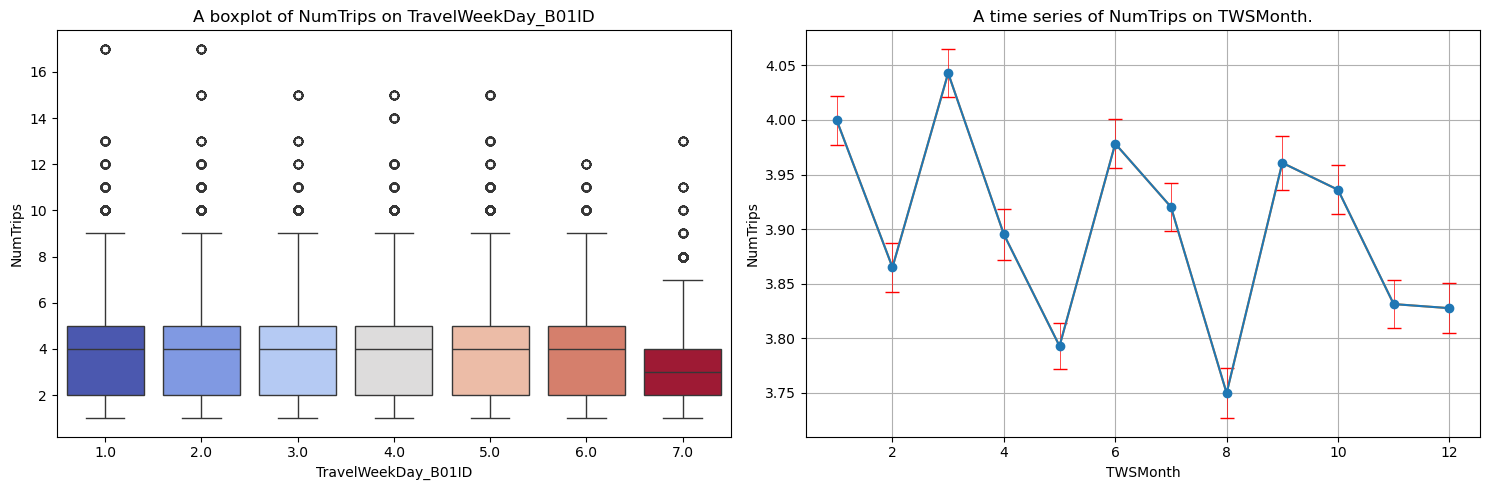

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_box_plot(x="TravelWeekDay_B01ID", y="NumTrips")

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="NumTrips")

plt.tight_layout()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


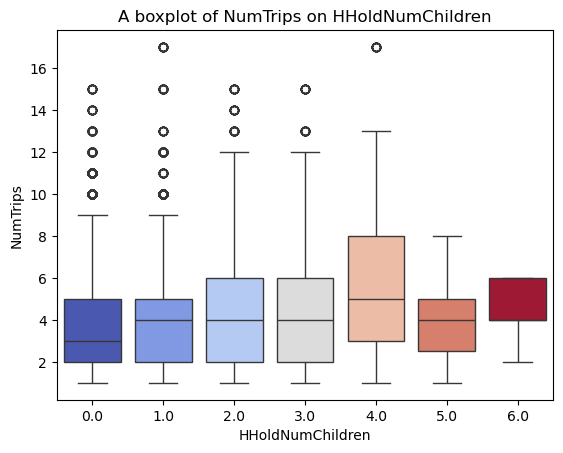

In [26]:
make_box_plot(x="HHoldNumChildren", y="NumTrips")

### TripDisExSW

In [17]:
rf_for_fi(df=df, corr_cut_off=0.15, outcome="TripDisExSW", refit=True, max_categories=55, cols_to_exclude=["NumTrips",
                                                                                                         "JourSeq",
                                                                                                         "TripStart_B02ID",
                                                                                                         "TripEnd",
                                                                                                         "TripStartMinutes",
                                                                                                         "TripStart",
                                                                                                         "W5xHH",
                                                                                                         "TripEndMinutes",
                                                                                                         "NumStages",
                                                                                                         "TripDestGOR_B02ID",
                                                                                                         "TripOrigGOR_B02ID",
                                                                                                         "TripEndHours",
                                                                                                         "TripEnd_B02ID",
                                                                                                         "TripEnd_B01ID",
                                                                                                         "TripStart_B01ID",
                                                                                                         "W5",
                                                                                                         "TripStartHours",
                                                                                                         "TripType"])

INFO: 181
INFO: Model: /Models/rf_model_TripDisExSW.pkl already exists!
INFO: Refit set to: True. Fitting
INFO: 181
INFO: 181


TravDay_x                 0.05
TravelWeekDay_B01ID       0.04
IndIncome2002_B02ID       0.03
TWEWeek                   0.02
IndWkGOR_B02ID            0.02
RsMnCyB_B01ID             0.02
MainMode_B03ID            0.02
TWSWeek                   0.02
W3                        0.02
RsMnCyA_B01ID             0.02
TWSDay                    0.02
IntPlane_B01ID            0.02
EngineCap                 0.02
TravelDayType_B01ID       0.01
VehAge_B01ID              0.01
WkPlace_B01ID             0.01
W2                        0.01
TrainFreq_B01ID           0.01
IndividualID_x            0.01
TWEDay                    0.01
VehTotMileage_B01ID       0.01
PrbJobN_B01ID             0.01
NumVehicles               0.01
TravelWeekDay_B02ID       0.01
Deliv_B01ID               0.01
ResLength_B01ID           0.01
IndividualID_y            0.01
OftHome_B01ID             0.01



INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


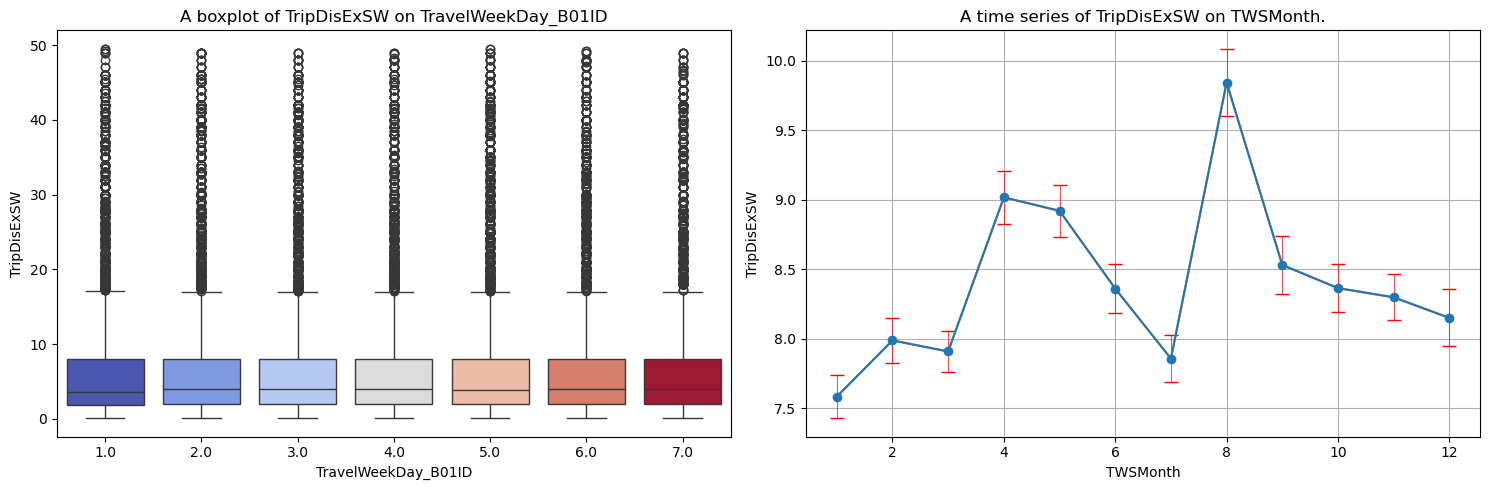

In [19]:
df_distance_no_outlier = df[df["TripDisExSW"] < 50]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_box_plot(x="TravelWeekDay_B01ID", y="TripDisExSW", data=df_distance_no_outlier)

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="TripDisExSW")

plt.tight_layout()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


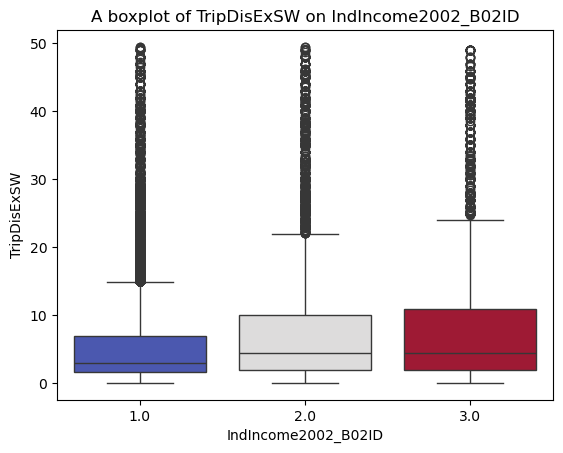

In [25]:
make_box_plot(data=df_distance_no_outlier, x="IndIncome2002_B02ID", y="TripDisExSW")

### TripType

In [41]:
trip_type_mapping = {v: k  for k, v in trip_type_mapping.items()}

In [43]:
def plot_TripType_ts(time_var,df=df, trip_type_mapping=trip_type_mapping):

    TripType_ts_data = df.groupby(time_var)["TripType"].value_counts()

    TripType_ts_data = TripType_ts_data.to_frame().reset_index()

    for i in TripType_ts_data["TripType"].unique():
        #print(i)
        dta = TripType_ts_data[TripType_ts_data["TripType"] == i]
        x = dta["count"]
        y = dta[time_var]

        plt.plot(y, x, label=str(trip_type_mapping[i]))

    plt.title(f"TripType on {time_var}")
    plt.grid()
    plt.legend()

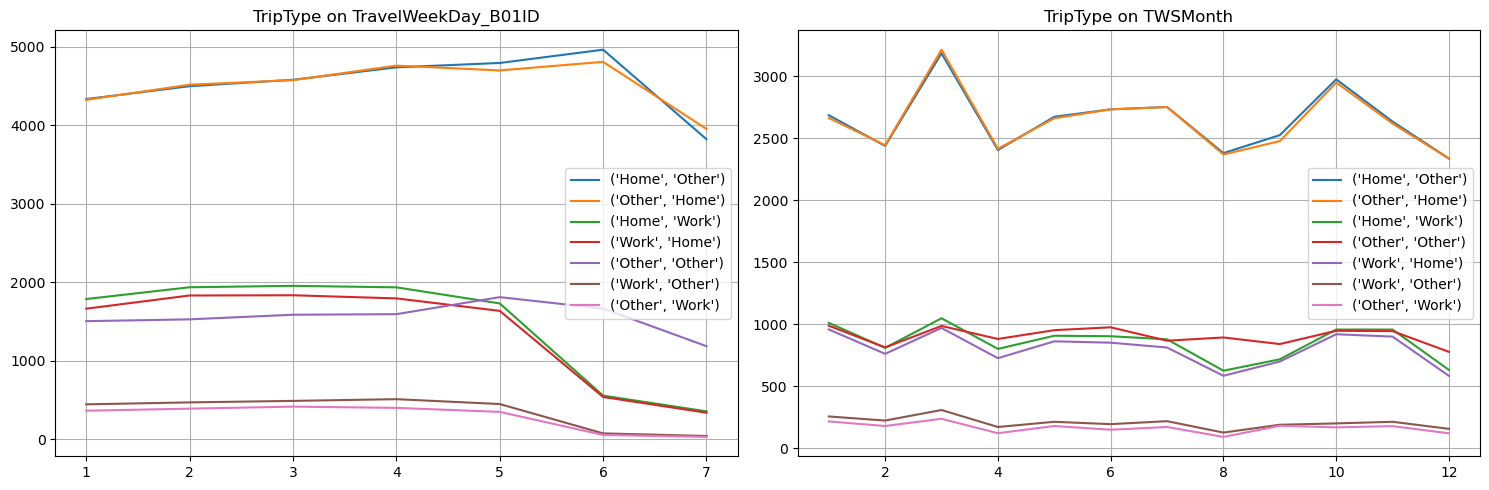

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plot_TripType_ts("TravelWeekDay_B01ID")

plt.subplot(1,2,2)
plot_TripType_ts("TWSMonth")

plt.tight_layout()

### Exploring Variables relating to vehicle

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


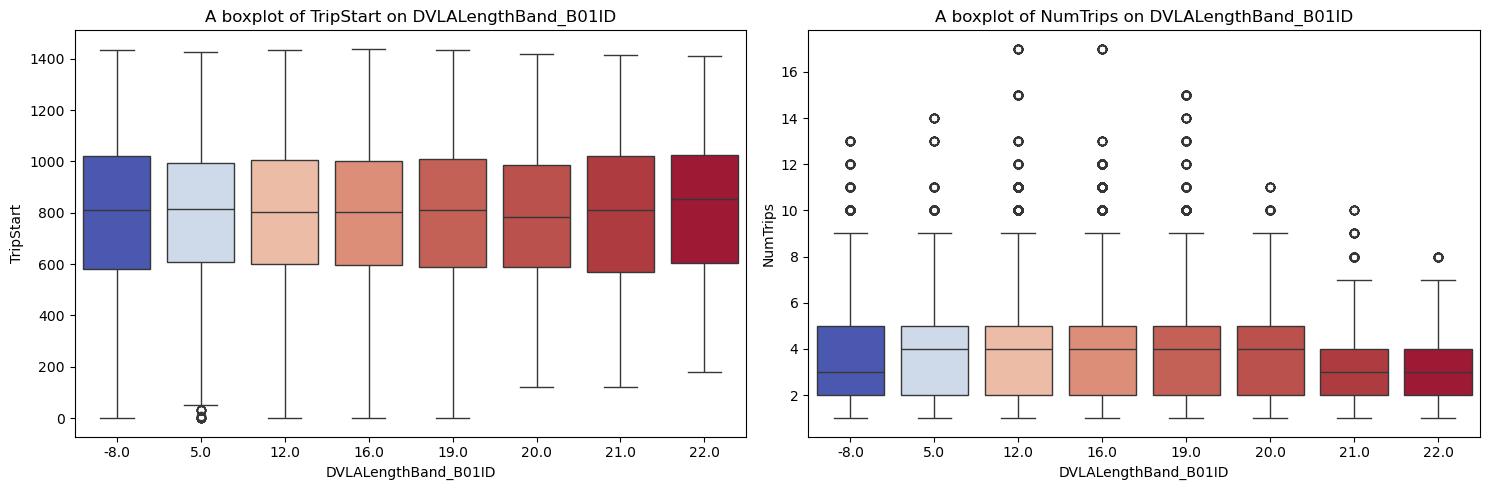

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_box_plot(x="DVLALengthBand_B01ID", y="TripStart")

plt.subplot(1,2,2)
make_box_plot(x="DVLALengthBand_B01ID", y="NumTrips")



plt.tight_layout()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


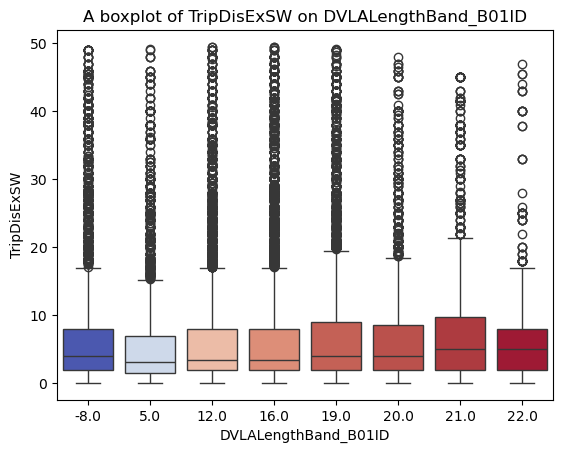

In [ ]:
make_box_plot(data=df_distance_no_outlier, x="DVLALengthBand_B01ID", y="TripDisExSW")

### DF for GAN

In addition to our outcome variables of interest, we will include in our GAN dataframe:

* `PSUGOR_B02ID` --> PSU Region
* `TWSMonth_B01ID` --> Travel Week Start - Month - coded month
* `IndIncome2002_B02ID` --> Individual Income - 2002 bandings - 3 categories
* `HHoldNumChildren` --> Number of children in household - actual number                                      
* `TravelYear` --> Year of trip
* `DVLALengthBand_B01ID` --> Vehicle length - 7 length and type categories
* `TravelWeekDay_B03ID` --> Day of week trip took place - weekday and weekend split

**TripType mapping**



In [57]:
outcome_vars = ["TripStart", "TripEnd", "NumTrips", "TripDisExSW", "TripType"]
extra_vars = ["IndividualID_x", "PSUGOR_B02ID", "TWSMonth", "IndIncome2002_B02ID", "HHoldNumChildren", "TravelYear", "VehMakeModel_B02ID", "TravelWeekDay_B01ID", "JourSeq"]

In [58]:
gan_df = df[extra_vars + outcome_vars]

In [59]:
individual_ids = gan_df["IndividualID_x"].unique()


In [62]:
gan_df[gan_df["IndividualID_x"] == individual_ids[4]].sort_values(["TravelWeekDay_B01ID","JourSeq"])[["TravelWeekDay_B01ID", "JourSeq",	"TripStart", "TripEnd",	"NumTrips",	"TripDisExSW"]]

,TravelWeekDay_B01ID,JourSeq,TripStart,TripEnd,NumTrips,TripDisExSW
2416,2.0,1.0,840.0,850.0,2,1.5
2379,2.0,2.0,900.0,910.0,2,1.5
432,3.0,1.0,855.0,870.0,2,3.0
276,3.0,2.0,900.0,915.0,2,3.0
24582,4.0,1.0,840.0,855.0,2,1.5
25583,4.0,2.0,915.0,930.0,2,1.5
2391,5.0,1.0,615.0,630.0,2,1.5
3507,5.0,2.0,735.0,750.0,2,1.5
2392,6.0,1.0,555.0,570.0,2,1.5
2377,6.0,2.0,630.0,645.0,2,1.5


### (1) Binary classification model for do trip or not to do trip

### (4) Multi-class classification problem for num trips

In [ ]:
# Finding distribution of num trips

gan_df.value_counts("NumTrips", normalize=True)

# 10 trips seams like a good number

NumTrips
2     0.331439
4     0.235519
3     0.116968
6     0.097422
5     0.096255
7     0.044753
8     0.028983
1     0.017292
9     0.012056
10    0.009742
11    0.004800
12    0.002192
13    0.001187
15    0.000761
17    0.000345
14    0.000284
Name: proportion, dtype: float64